<a href="https://colab.research.google.com/github/zeinabmohamed/HistopathologicCancerDetection/blob/master/perceptron_model_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


List all My drive sub dir's


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import numpy as np
import imageio
import matplotlib.pylab as plt
import sklearn.metrics as sm
import seaborn as sb
train_data_path = "drive/My Drive/histopathologic-cancer-detection/train_min/"
train_items = os.listdir(train_data_path)
train_items_len =len(train_items)
print(train_items_len)  
print (train_items)
 

5144
['eca027e439de9ddd9500af73e092c26a27e1821d.tif', 'f6366f772c75702e696325d0c9054922c3120987.tif', 'd46b4e68b13014f730dc36123c27f1409965f971.tif', 'fbf27cd471864ec069365a2319da09fee9dfafe6.tif', 'dc7020bfdf90b844ed790bfe5121b4d63d640038.tif', 'e9f1112e7fd17dff968c561d08856c1686b1640b.tif', 'f3bfcda6de9d4b00c0510e718c4109c3b0baed27.tif', 'fa8ae275a12c9954bf88416fced7d978dc416df8.tif', 'eab2a9da645168e596be831393d62151c17294f2.tif', 'eed624f521b3df013d75d70fb86b37ba5c70aa74.tif', 'd12f65027c9b9ae2db159940f993f7f735020505.tif', 'd45fe9ab2c15413ed3ef0f82173bc88d0fa9def8.tif', 'd95714482c5e94cdbaf9dded43500d5ed8428cf5.tif', 'dafff0be12de64f343895552f63dc4e8bc86592d.tif', 'd2076d2ec6e0286c537f556bc789eb4508e4c072.tif', 'fed12bf95ee7b38df31c36131448df619c040517.tif', 'f36749955146885559986390dc1c22e888bda0c4.tif', 'e23ea7f5b2b391742f54afbc71ee44a313edb095.tif', 'e8085c2db5431a3eea7015243c095e5fb34689fd.tif', 'dfcdd52d6ea62a023e5bb010028060a2e89f9d6b.tif', 'f72ab525d00b82dd7434a09701dba500a

In [0]:
train_ite = []
for i in train_items:
  x=i.split('.tif')
  x1 = x[0]
  train_ite.append(x1)
print(train_ite)



['eca027e439de9ddd9500af73e092c26a27e1821d', 'f6366f772c75702e696325d0c9054922c3120987', 'd46b4e68b13014f730dc36123c27f1409965f971', 'fbf27cd471864ec069365a2319da09fee9dfafe6', 'dc7020bfdf90b844ed790bfe5121b4d63d640038', 'e9f1112e7fd17dff968c561d08856c1686b1640b', 'f3bfcda6de9d4b00c0510e718c4109c3b0baed27', 'fa8ae275a12c9954bf88416fced7d978dc416df8', 'eab2a9da645168e596be831393d62151c17294f2', 'eed624f521b3df013d75d70fb86b37ba5c70aa74', 'd12f65027c9b9ae2db159940f993f7f735020505', 'd45fe9ab2c15413ed3ef0f82173bc88d0fa9def8', 'd95714482c5e94cdbaf9dded43500d5ed8428cf5', 'dafff0be12de64f343895552f63dc4e8bc86592d', 'd2076d2ec6e0286c537f556bc789eb4508e4c072', 'fed12bf95ee7b38df31c36131448df619c040517', 'f36749955146885559986390dc1c22e888bda0c4', 'e23ea7f5b2b391742f54afbc71ee44a313edb095', 'e8085c2db5431a3eea7015243c095e5fb34689fd', 'dfcdd52d6ea62a023e5bb010028060a2e89f9d6b', 'f72ab525d00b82dd7434a09701dba500a8f7231e', 'd969969bb49de6f93ee5d4ce2788a056ed8f1074', 'd9913129103f6fe4427af9bc197138

Test Load single Tif Image

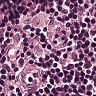

In [0]:
# Load Tif image 
from PIL import Image
img = Image.open(train_data_path+"b61bcb7cb5095d17967d8446afcf60ae82e40a18.tif")
img #show image 

Load all train data `<tif images>`


In [0]:
for each_image in train_items:
  if each_image.endswith(".tif"):
    #print (each_image)
    full_path = train_data_path + each_image
    #print (full_path)

Reshape Image size to store it in matrix as one raw 

/usr/local/lib/python3.6/dist-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/usr/local/lib/python3.6/dist-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/usr/local/lib/python3.6/dist-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/usr/local/lib/python3.6/dist-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


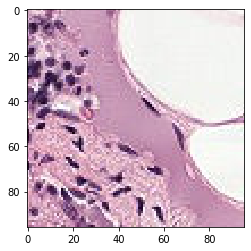

In [0]:
# All Images (96, 96, 3) = 27648 
image_size = 96*96*3
train_items_matrix=np.zeros((train_items_len,image_size))  

for i in range (train_items_len):
    imarray=imageio.imread(train_data_path +  train_items[i])
    imarray.size
    train_items_matrix[i,:]=imarray.reshape((1,image_size))
#To Display it
plt.imshow((train_items_matrix[1,:].reshape(96,96,3)).astype(np.uint8)) 

Import Train Labels and match it with Imported Images

In [0]:
#Import Train labels that match uploaded images
import csv
import sys

train_label = []
#loop through image id
for i in train_ite:
  with open("drive/My Drive/histopathologic-cancer-detection/train_labels.csv") as f:
    d = csv.reader(f)
    for row in d:
      if i == row[0]:
        train_label.append(row)




print(train_label)
        
  

  



[['eca027e439de9ddd9500af73e092c26a27e1821d', '1'], ['f6366f772c75702e696325d0c9054922c3120987', '0'], ['d46b4e68b13014f730dc36123c27f1409965f971', '1'], ['fbf27cd471864ec069365a2319da09fee9dfafe6', '0'], ['dc7020bfdf90b844ed790bfe5121b4d63d640038', '1'], ['e9f1112e7fd17dff968c561d08856c1686b1640b', '0'], ['f3bfcda6de9d4b00c0510e718c4109c3b0baed27', '0'], ['fa8ae275a12c9954bf88416fced7d978dc416df8', '0'], ['eab2a9da645168e596be831393d62151c17294f2', '0'], ['eed624f521b3df013d75d70fb86b37ba5c70aa74', '1'], ['d12f65027c9b9ae2db159940f993f7f735020505', '1'], ['d45fe9ab2c15413ed3ef0f82173bc88d0fa9def8', '0'], ['d95714482c5e94cdbaf9dded43500d5ed8428cf5', '1'], ['dafff0be12de64f343895552f63dc4e8bc86592d', '0'], ['d2076d2ec6e0286c537f556bc789eb4508e4c072', '0'], ['fed12bf95ee7b38df31c36131448df619c040517', '0'], ['f36749955146885559986390dc1c22e888bda0c4', '0'], ['e23ea7f5b2b391742f54afbc71ee44a313edb095', '0'], ['e8085c2db5431a3eea7015243c095e5fb34689fd', '1'], ['dfcdd52d6ea62a023e5bb0100280

Export Matched ID with labes to CSV File

In [0]:
import csv
import sys
#with open('drive/My Drive/histopathologic-cancer-detection/train_labels_min.csv', 'w', newline='') as myfile:
    #wr = csv.writer(myfile)
    #wr.writerows(train_label)

prepare Features and labels

In [0]:
train_label_matrix = np.genfromtxt("drive/My Drive/histopathologic-cancer-detection/train_labels_min.csv",delimiter=',',dtype=float)
y = train_label_matrix[0:4000,1]
X = train_items_matrix[0:4000,:]
X = np.hstack((X,np.ones((len(X),1))))

#W = np.random.rand(27649,1)# Initiate weight for your input features
W = np.zeros((27649,1))
print(W)
print(W.shape)
print(W.dtype)
print(y)
print(y.shape)
print(X)
print(X.shape)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(27649, 1)
float64
[1. 0. 1. ... 0. 0. 0.]
(4000,)
[[160. 105. 145. ...  87. 124.   1.]
 [198. 163. 183. ... 156. 185.   1.]
 [213. 192. 201. ... 187. 200.   1.]
 ...
 [200. 175. 215. ... 239. 237.   1.]
 [250. 174. 223. ... 164. 230.   1.]
 [239. 232. 239. ... 239. 243.   1.]]
(4000, 27649)


Train Module

In [0]:
    # x:   train_items_matrix
    # y:   train_label_matrix
    # W:   Weight
    # l_r: learning rate
    # Iterations: number of Iterations


def ActivationFunc(X,W):
  z = np.dot(X, W)
  y_pred = np.zeros((len(X)))
  counter = 0
  for i in z:
    
    if i >= 0:
      y_pred[counter] = 1
    else:
      y_pred[counter] = 0
    counter += 1

  return y_pred

def Error(X,W):
  e = y-ActivationFunc(X,W)
  
  return e

def gradient_descent(X,y,W,L_R,Iterations):
  Errors = np.zeros((Iterations,1))
    
  for i in range(Iterations): 
    W += L_R*np.dot(X.T,(y-ActivationFunc(X,W)).reshape((len(X),1)))
    E = Error(X,W)**2
    SSE = np.sum(E)
    Errors[i] = SSE 
  return (Errors,W)

#unit_step = lambda i: 0 if x < 0 else 1
#print(unit_step(result.all))


Optimum Weights= [[-143156.4]
 [-586422.9]
 [-415981.5]
 ...
 [ -80341.8]
 [  -4762.7]
 [ -12100.6]] 



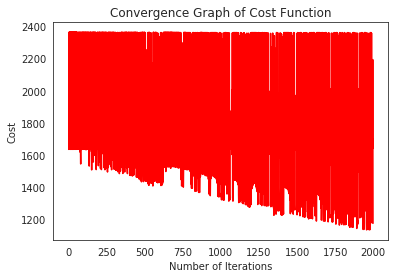

In [0]:
Iterations = 2000
L_R = 0.1
(Errors,W) = gradient_descent(X,y,W,L_R,Iterations)
print("Optimum Weights=", W, "\n")
plt.figure()
sb.set_style('white')
plt.plot(range(len(Errors)), Errors, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Testing Module

[[-143156.4]
 [-586422.9]
 [-415981.5]
 ...
 [ -80341.8]
 [  -4762.7]
 [ -12100.6]]
Accuraccy=63.5%


Text(0.5, 15.0, 'Predicated Label')

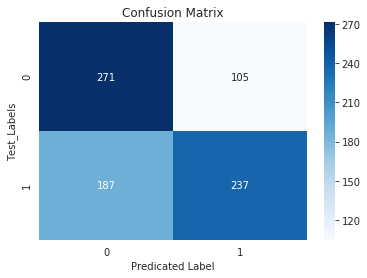

In [0]:
test_label_matrix = np.genfromtxt("drive/My Drive/histopathologic-cancer-detection/train_labels_min.csv",delimiter=',',dtype=float)
Test_Labels = train_label_matrix[4000:4800,1]
X = train_items_matrix[4000:4800,:]
X = np.hstack((X,np.ones((len(X),1))))
print(W)
# Calculate Predicted Y 
def predict(X,W):
    return ActivationFunc(X,W)
pred_labels = predict(X,W)
#Calculate Accuracy 
acc = sm.accuracy_score(pred_labels,Test_Labels)
print('Accuraccy='+str(acc*100)+'%')

#Plot Confusion Matrix 
cm = sm.confusion_matrix(pred_labels,Test_Labels)
sb.heatmap(cm, cmap="Blues", annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Test_Labels')
plt.xlabel('Predicated Label')
#plt.savefig('Confusion.jpg')